<a href="https://colab.research.google.com/github/rudrakshrajvyas/VAFSUD/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt

In [ ]:

start=dt.datetime(2013,1,1)
end=dt.datetime(2022,1,1)                  
df=data.get_data_stooq('AMZN',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-31,168.956,169.350,166.558,166.717,47830380
2021-12-30,169.700,170.888,168.524,168.644,37583100
2021-12-29,170.840,171.212,168.601,169.201,35754040
2021-12-28,170.182,172.176,169.136,170.661,54711860
2021-12-27,171.037,172.943,169.216,169.670,58846820


In [ ]:
df=df.sort_values(by=['Date'])

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,12.8020,12.9050,12.6630,12.8655,65421580
2013-01-03,12.8595,13.0440,12.8185,12.9240,55021220
2013-01-04,12.8790,12.9900,12.8325,12.9575,37494220
2013-01-07,13.1485,13.4865,13.1335,13.4230,98205480
2013-01-08,13.3535,13.4490,13.1785,13.3190,60241120


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2013-01-02,12.8020,12.9050,12.6630,12.8655,65421580
1,2013-01-03,12.8595,13.0440,12.8185,12.9240,55021220
2,2013-01-04,12.8790,12.9900,12.8325,12.9575,37494220
3,2013-01-07,13.1485,13.4865,13.1335,13.4230,98205480
4,2013-01-08,13.3535,13.4490,13.1785,13.3190,60241120


In [ ]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,12.8020,12.9050,12.6630,12.8655,65421580
1,12.8595,13.0440,12.8185,12.9240,55021220
2,12.8790,12.9900,12.8325,12.9575,37494220
3,13.1485,13.4865,13.1335,13.4230,98205480
4,13.3535,13.4490,13.1785,13.3190,60241120


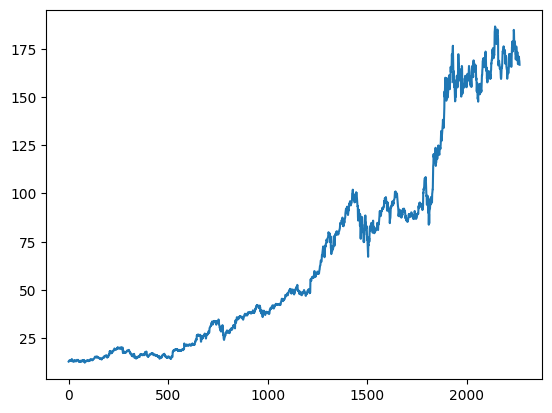

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,12.8020,12.9050,12.6630,12.8655,65421580
1,12.8595,13.0440,12.8185,12.9240,55021220
2,12.8790,12.9900,12.8325,12.9575,37494220
3,13.1485,13.4865,13.1335,13.4230,98205480
4,13.3535,13.4490,13.1785,13.3190,60241120
...,...,...,...,...,...
2262,171.0370,172.9430,169.2160,169.6700,58846820
2263,170.1820,172.1760,169.1360,170.6610,54711860
2264,170.8400,171.2120,168.6010,169.2010,35754040
2265,169.7000,170.8880,168.5240,168.6440,37583100


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2262    170.18305
2263    170.20166
2264    170.22120
2265    170.23670
2266    170.24353
Name: Close, Length: 2267, dtype: float64

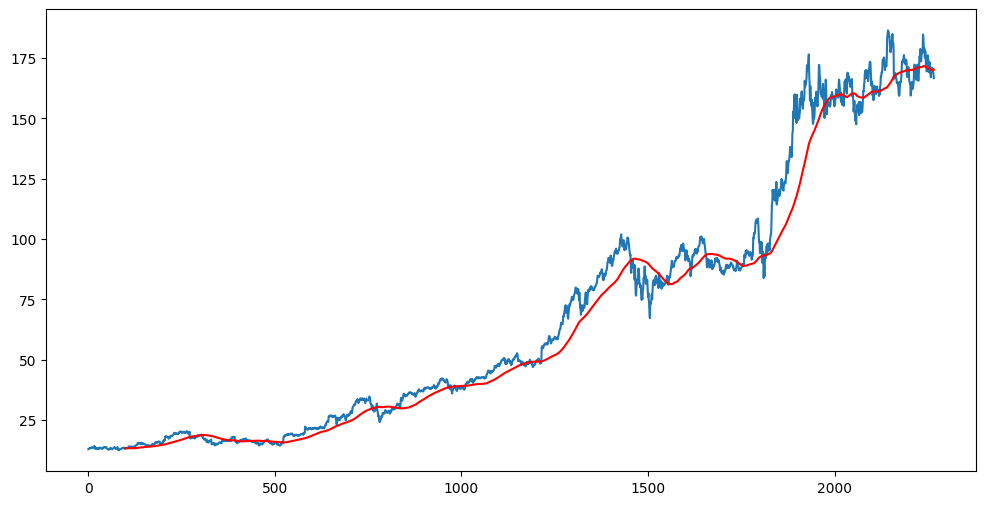

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2262    168.959145
2263    169.042030
2264    169.115070
2265    169.174360
2266    169.250945
Name: Close, Length: 2267, dtype: float64

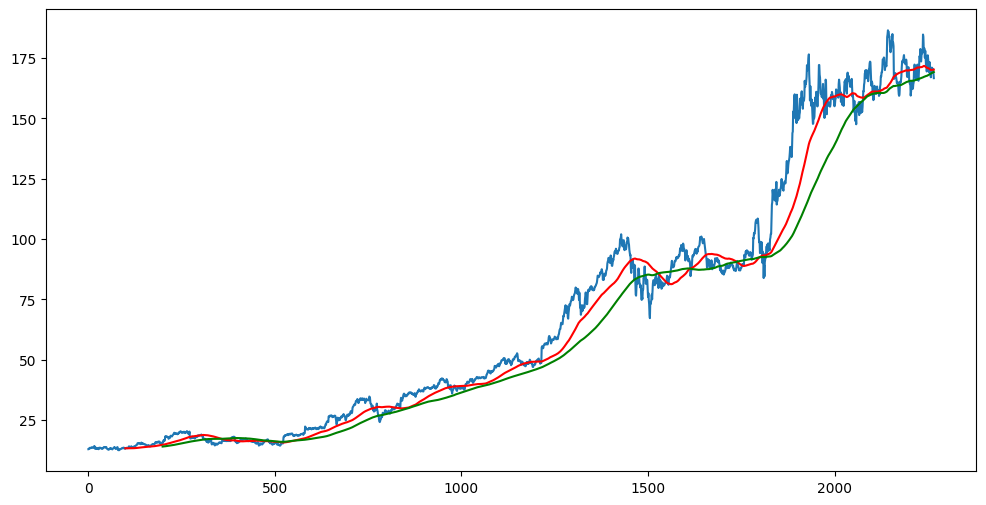

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2267, 5)

In [ ]:
# splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#extra
valid =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


print(data_training.shape)
print(data_testing.shape)
#extra
print(valid.shape)


(1586, 1)
(681, 1)
(681, 1)


In [ ]:
data_training.head()

,Close
0,12.8655
1,12.9240
2,12.9575
3,13.4230
4,13.3190


In [ ]:
data_testing.head()

,Close
1586,96.1885
1587,95.0875
1588,95.1125
1589,97.5315
1590,96.9215


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00506897],
       [0.00572213],
       [0.00609617],
       ...,
       [0.90247252],
       [0.90072518],
       [0.91502772]])

In [ ]:
x_train=[]
y_train=[]
 
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1486, 100, 1)

In [ ]:
# ML Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
#model.fit(x_train,y_train,epochs=50)

#model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
47/47 [==============================] - 41s 709ms/step - loss: 0.0455
Epoch 2/25
47/47 [==============================] - 21s 436ms/step - loss: 0.0069
Epoch 3/25
47/47 [==============================] - 17s 361ms/step - loss: 0.0077
Epoch 4/25
47/47 [==============================] - 18s 382ms/step - loss: 0.0058
Epoch 5/25
47/47 [==============================] - 17s 354ms/step - loss: 0.0058
Epoch 6/25
47/47 [==============================] - 17s 352ms/step - loss: 0.0055
Epoch 7/25
47/47 [==============================] - 19s 406ms/step - loss: 0.0045
Epoch 8/25
47/47 [==============================] - 18s 380ms/step - loss: 0.0042
Epoch 9/25
47/47 [==============================] - 17s 353ms/step - loss: 0.0045
Epoch 10/25
47/47 [==============================] - 18s 378ms/step - loss: 0.0049
Epoch 11/25
47/47 [==============================] - 16s 349ms/step - loss: 0.0040
Epoch 12/25
47/47 [==============================] - 16s 351ms/step - loss: 0.0045
Epoch 13/25
4

In [ ]:
#extra code
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

In [ ]:
model.save('keras.model.h5')

In [ ]:
data_testing.head()

,Close
1586,96.1885
1587,95.0875
1588,95.1125
1589,97.5315
1590,96.9215


In [ ]:
data_training.tail(100)

,Close
1486,79.0665
1487,79.0710
1488,83.8875
1489,83.6785
1490,84.5085
...,...
1581,92.2435
1582,93.1520
1583,93.2410
1584,93.0845


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-32-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [ ]:
final_df.head()

,Close
0,79.0665
1,79.0710
2,83.8875
3,83.6785
4,84.5085


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.09942449],
       [0.09946219],
       [0.13981084],
       [0.13806001],
       [0.14501307],
       [0.17943906],
       [0.13589451],
       [0.14879117],
       [0.11944593],
       [0.12443035],
       [0.12535603],
       [0.13385886],
       [0.13169755],
       [0.10385601],
       [0.07411705],
       [0.08692156],
       [0.06329793],
       [0.04895202],
       [0.01402758],
       [0.        ],
       [0.05316992],
       [0.04929129],
       [0.0561522 ],
       [0.06618386],
       [0.08174865],
       [0.06547599],
       [0.09693647],
       [0.1196051 ],
       [0.1309436 ],
       [0.13213316],
       [0.13079282],
       [0.12423349],
       [0.11445314],
       [0.13847468],
       [0.14233656],
       [0.14629059],
       [0.14753879],
       [0.12071926],
       [0.1240073 ],
       [0.13025249],
       [0.13680344],
       [0.12311514],
       [0.10468116],
       [0.1367448 ],
       [0.15697567],
       [0.11823124],
       [0.12119676],
       [0.131

In [ ]:
input_data.shape

(781, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(681, 100, 1)
(681,)


In [ ]:
#making Prediction

y_predicted = model.predict(x_test)

22/22 [==============================] - 3s 91ms/step


In [ ]:
y_predicted.shape

(681, 1)

In [ ]:
 y_test

array([0.24285846, 0.23363519, 0.23384462, 0.254109  , 0.24899893,
       0.24401032, 0.23772744, 0.23324565, 0.2590641 , 0.2540755 ,
       0.24169822, 0.24034531, 0.23284774, 0.22870522, 0.20051603,
       0.20782093, 0.22081811, 0.23607295, 0.21991757, 0.21571642,
       0.21510907, 0.21601381, 0.19750025, 0.20076735, 0.20627534,
       0.19905422, 0.19785209, 0.18057417, 0.14606859, 0.16151191,
       0.16525651, 0.17189961, 0.19270432, 0.21641172, 0.21769762,
       0.21418758, 0.22046208, 0.2201982 , 0.22705073, 0.23347602,
       0.23658396, 0.24052123, 0.23763529, 0.23872432, 0.22380039,
       0.23199326, 0.2346949 , 0.23023406, 0.24219666, 0.24727323,
       0.24923768, 0.25087541, 0.25481687, 0.26988741, 0.2820762 ,
       0.27524042, 0.2793955 , 0.28358409, 0.27893476, 0.27144975,
       0.26553128, 0.25992695, 0.26876906, 0.27248015, 0.27512314,
       0.26382234, 0.25093405, 0.23811698, 0.23228647, 0.2189877 ,
       0.21418758, 0.20075059, 0.17641072, 0.18591881, 0.18825

In [ ]:
y_predicted 

array([[0.19302967],
       [0.19457698],
       [0.19621086],
       [0.19794844],
       [0.19984305],
       [0.20193134],
       [0.20420888],
       [0.20662376],
       [0.20909086],
       [0.21160062],
       [0.21414505],
       [0.21667972],
       [0.2191421 ],
       [0.22144577],
       [0.22349958],
       [0.22514978],
       [0.22628507],
       [0.2268804 ],
       [0.22701015],
       [0.2267493 ],
       [0.22616129],
       [0.2253141 ],
       [0.22426991],
       [0.2230419 ],
       [0.22164401],
       [0.2201094 ],
       [0.2184657 ],
       [0.21673986],
       [0.21492659],
       [0.21296325],
       [0.2108204 ],
       [0.20851004],
       [0.2060765 ],
       [0.20361298],
       [0.20124823],
       [0.19910234],
       [0.19727936],
       [0.19586495],
       [0.19489548],
       [0.194386  ],
       [0.19434159],
       [0.19475609],
       [0.1956352 ],
       [0.19694246],
       [0.19862361],
       [0.20056745],
       [0.2026688 ],
       [0.204

In [ ]:
 scaler.scale_

array([0.00837717])

In [ ]:
scale_factor=1/0.00689728
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

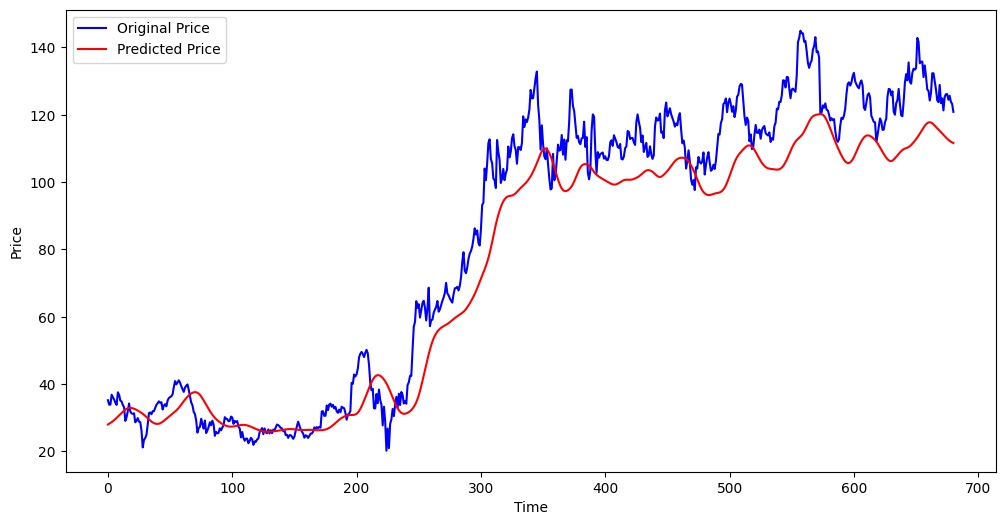

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#scores = model.evaluate(x_test, y_test)
#LSTM_accuracy = scores[1]*100
#print('Test accuracy: ', scores[1]*100, '%')

In [ ]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

22/22 [==============================] - 2s 91ms/step


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Close    10.2719
dtype: float64